## <span style="color:green"><h1><center>Downloading Watershed Corresponding to USGS Site Number</center></h1></span>
<center>Prepared by <br>
    <b>Jibin Joseph and Venkatesh Merwade</b><br> 
Lyles School of Civil Engineering, Purdue University<br>
joseph57@purdue.edu, vmerwade@purdue.edu<br>
<b><br>
    FAIR Science in Water Resources</b><br></center>


## <span style="color:green">Objective</span>
<p style='text-align: justify;'>We will watershed shapefile using USGS site number. Save the shapefile and plot it.</p> 

## <span style="color:green">Import the packages/modules required for this exercise</span>

We need different packages as shown below. It can be either installed using pip method or conda method.


In [22]:
## Import the modules/packages/libraries required
import os
import matplotlib.pyplot as plt

from pynhd import NLDI
from pyproj import CRS

## <span style="color:green">Step 1a: Input USGS Site, DEM resolution, and create a directory</span> 
<ul>
<li>Input: <span style="color:red">USGS Site</span></li>
<li>Input: <span style="color:red">Desired resolution</span></li>
<li>Create: <span style="color:red">Folder for storing downloaded files from USGS AWS</span></li>

In [35]:
## Input the USGS site number to get the shapefile
## E.g. "04180000" has a drainage area of 270 sq mi and can downloaded within 2-3 minutes
## But "03335500" has a drainage area of 7267 sq mi and needs for time and space
## WRITE CODE BELOW
site_id='04180000' # Cedar Creek  

## Define a function for making a directory depending on whether is exists or not.
## We are creating a function so that it can be used later for creating three folders in the later modules
def check_create_path_func(path):
    isExist = os.path.exists(path)
    if not isExist:
        # Create a new directory because it does not exist
        os.makedirs(path)
        print(f"The new directory \033[1m'{path}'\033[0m is created!")
    else:
        print(f"The new directory \033[1m'{path}'\033[0m is not created as it already exists!")
        
## Create the a folder for storing DEMs using the earlier defined function
## WRITE CODE BELOW
folder_input=f'./input_{site_id}'
check_create_path_func(folder_input)


The new directory './input_04180000' is not created as it already exists!


## <span style="color:green">Step 1b: Input USGS Site and get the basin</span> 

<ul>
<li>Input: <span style="color:red">Get a input station</span></li>
<li>Output: <span style="color:red">Find out the basin</span></li>
<li>Output: <span style="color:red">Save the basin file as shapefile</span></li>
    

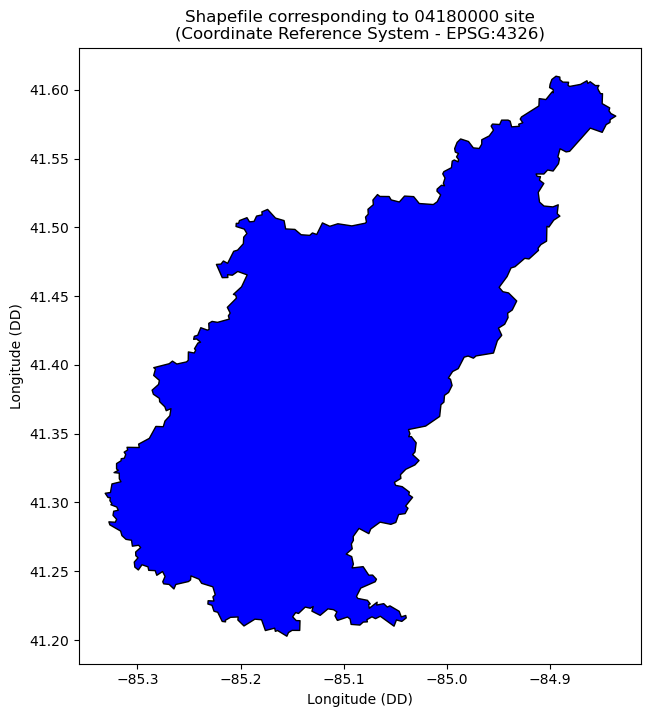

In [36]:
## Get the watershed using USGS station number using pynhd module
## WRITE THE CODE BELOW
watershed=NLDI().get_basins(site_id)

## Plot the watershed
## DD indicates latitude/ longitude degrees is followed by immediately followed by decimal
ax = watershed.plot(facecolor="b", 
                    edgecolor="k", 
                    figsize=(8, 8))
plt.title(f"Shapefile corresponding to {site_id} site\n(Coordinate Reference System - {watershed.crs})")
plt.xlabel("Longitude (DD)")
plt.ylabel("Longitude (DD)")

## Saving the watershed file as a shapefile at desired location
## WRITE THE CODE BELOW
shapefile_fileloc_filename=f'{folder_input}/shape_{site_id}.shp'
watershed.to_file(filename=shapefile_fileloc_filename,
                  driver='ESRI Shapefile',
                  mode='w')


## <span style="color:green">Step 2: Get the Extents and Coordinate System of the shapefile</span>

<ul>
<li> Extents of the basin (watershed) is obtained using .total_bounds </li>
<li> Then we will find the bounding extents using math floor and ceil function </li>
    

In [37]:
## Get the min and max of latitude and longitude (or easting and northing)
extents_basin=watershed.total_bounds

## N or S and W or E may become a problem
print(f'Left Bounding Longtitude is {extents_basin[0]:.3f}\u00b0 or {abs(extents_basin[0]):.3f}\u00b0 W')
print(f'Right Bounding Longtitude is {extents_basin[2]:.3f}\u00b0 or {abs(extents_basin[2]):.3f}\u00b0 W')
print(f'Bottom Bounding Latitude is {extents_basin[1]:.3f}\u00b0 or {abs(extents_basin[1]):.3f}\u00b0 N')
print(f'Top Bounding Latitude is {extents_basin[3]:.3f}\u00b0 or {abs(extents_basin[3]):.3f}\u00b0 N')

print("\n\n")

print(f"The coordinate system of the watershed is - {watershed.crs}")

Left Bounding Longtitude is -85.332° or 85.332° W
Right Bounding Longtitude is -84.837° or 84.837° W
Bottom Bounding Latitude is 41.203° or 41.203° N
Top Bounding Latitude is 41.610° or 41.610° N



The coordinate system of the watershed is - EPSG:4326
